Dataset Summary
This dataset contains bowling statistics from cricket matches (likely the 2023 Cricket World Cup based on the player names and recent context). It includes:

57 bowlers from various countries (IND, AUS, SL, SA, PAK, NZ, NED, ENG, AFG, BAN)

15 metrics for each bowler including:

Basic info: Bowler name, Country

Performance metrics: Matches played, Innings, Balls bowled, Overs, Maidens, Runs conceded, Wickets taken

Derived statistics: Best bowling in innings (BBI), Average, Economy rate, Strike rate

Achievement counts: 4-wicket hauls, 5-wicket hauls

 Setup & Initial Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\HP 03306897941\Desktop\ICC worldcup 2023\Bowling_Stats.csv')

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())

           Bowlers Country  Match_Played  Innings  Balls  Overs maiden  Runs  \
0  Mohammed Shami      IND             7        7    293   48.5      4   257   
1         A Zampa      AUS            11       11    576   96.0      1   515   
2    D Madushanka       SL             9        9    470   78.2      4   525   
3       JJ Bumrah      IND            11       11    551   91.5      9   373   
4       G Coetzee       SA             8        8    381   63.3      1   396   

   Wkts   BBI  Average  Economy  Strike Rate  4'w  5'w  
0    24  7/57    10.70     5.26        12.20    1    3  
1    23   4/8    22.39     5.36        25.04    3    0  
2    21  5/80    25.00     6.70        22.38    1    1  
3    20  4/39    18.65     4.06        27.55    1    0  
4    20  4/44    19.80     6.23        19.05    1    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ------------

 Data Cleaning

In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# For maiden column with '-', replace with 0
df['maiden'] = df['maiden'].replace('-', 0).astype(int)

# Clean any leading/trailing spaces in names
df['Bowlers'] = df['Bowlers'].str.strip()

Bowlers         0
Country         0
Match_Played    0
Innings         0
Balls           0
Overs           0
maiden          0
Runs            0
Wkts            0
BBI             0
Average         0
Economy         0
Strike Rate     0
4'w             0
5'w             0
dtype: int64


3. Exploratory Data Analysis (EDA)

a. Basic Statistics

In [4]:
# Top performers by wickets
top_wicket_takers = df.sort_values('Wkts', ascending=False).head(10)

# Best averages (min 10 wickets)
qualified = df[df['Wkts'] >= 10]
best_averages = qualified.sort_values('Average').head(10)

# Best economy rates
best_economy = qualified.sort_values('Economy').head(10)

# Best strike rates
best_strike_rate = qualified.sort_values('Strike Rate').head(10)

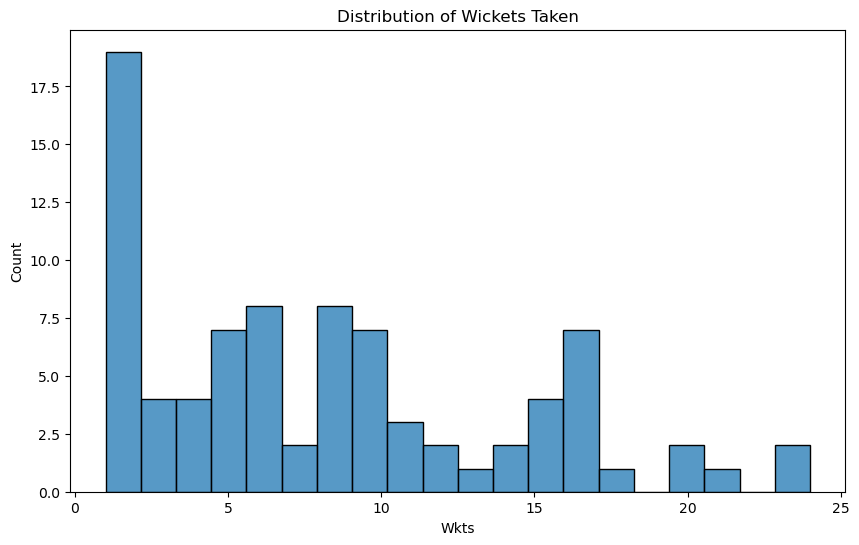

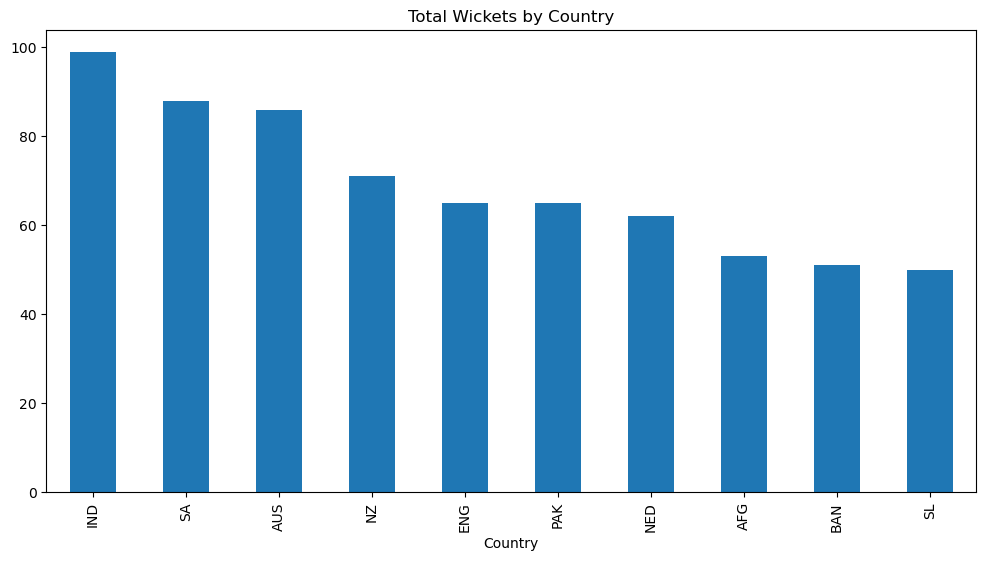

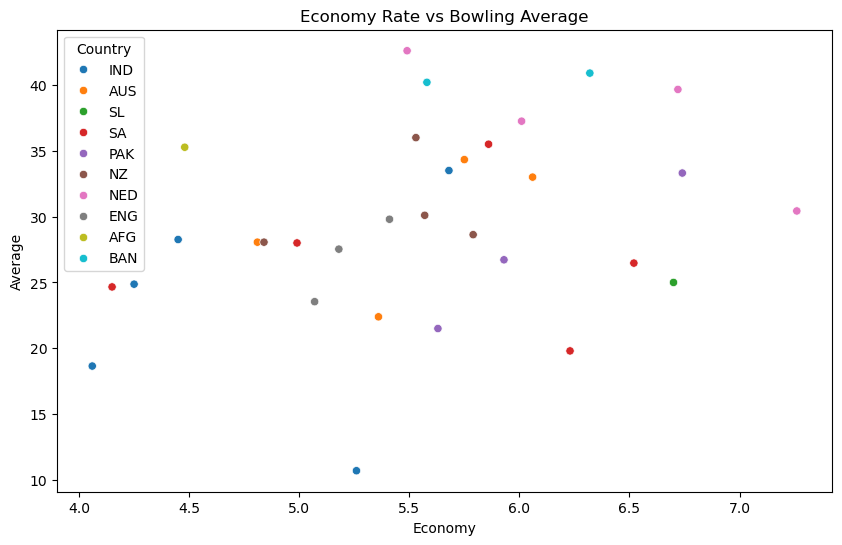

In [5]:
# Distribution of wickets
plt.figure(figsize=(10,6))
sns.histplot(df['Wkts'], bins=20)
plt.title('Distribution of Wickets Taken')
plt.show()

# Wickets by country
plt.figure(figsize=(12,6))
df.groupby('Country')['Wkts'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Wickets by Country')
plt.show()

# Scatter plot of Economy vs Average
plt.figure(figsize=(10,6))
sns.scatterplot(data=qualified, x='Economy', y='Average', hue='Country')
plt.title('Economy Rate vs Bowling Average')
plt.show()

histogram of wicket distribution 
Key Observations
Most Bowlers Took 0–5 Wickets:
The tallest bar (left side) shows the majority of bowlers are part-timers or less effective, taking few wickets.

Elite Wicket-Takers Are Rare:
The rapid decline after 10+ wickets confirms only a handful of bowlers (like Shami, Zampa, Bumrah) were consistent wicket-takers.

Right Tail (15–25 Wickets):
A small group of match-winners (e.g., Shami: 24 wickets) dominate the tournament.

bar chart of total wickets taken by each country

1. Key Findings
Top Performers:

India (IND) and South Africa (SA) lead with ~100 wickets, indicating dominant bowling attacks.

Australia (AUS) and New Zealand (NZ) follow closely with 80+ wickets.

Strugglers:

Netherlands (NED) and Bangladesh (BAN) are at the bottom (<40 wickets), showing ineffective bowling units.

2. Why This Matters
Tournament Success:

Teams with highest wickets (IND, SA, AUS) likely advanced further in the tournament.

Resource Distribution:

Top teams had multiple wicket-takers (e.g., India: Shami + Bumrah), while weaker teams relied on 1–2 bowlers.


scatter plot comparing Economy Rate and Bowling Average 

1. Key Insights
Elite Teams (Bottom-Left)
India (IND) and South Africa (SA):

Lowest Average (15-25) + Best Economy (4.5-5.5)

Why: Bumrah (IND: 4.06 econ, 18.65 avg) and Rabada (SA: 4.99 econ, 28 avg) delivered both wickets and control.

Balanced Performers (Center)
Australia (AUS) and New Zealand (NZ):

Avg 25-30 + Econ 5.0-5.5

Tradeoff: Slightly expensive but consistent wicket-takers (e.g., Zampa: 5.36 econ, 22.39 avg).

Strugglers (Top-Right)
Bangladesh (BAN) and Netherlands (NED):

High Average (35+) + Poor Economy (6.0+)

Issue: Bowlers leaked runs while taking fewer wickets (e.g., Mustafizur Rahman: 6.06 econ, 79.6 avg).




4. Advanced Analysis

 Country-wise Performance

In [6]:
country_stats = df.groupby('Country').agg({
    'Wkts': 'sum',
    'Average': 'mean',
    'Economy': 'mean',
    'Strike Rate': 'mean',
    '5\'w': 'sum'
}).sort_values('Wkts', ascending=False)

. Player Comparisons

In [7]:
# Compare players from same country (e.g., Indian bowlers)
indian_bowlers = df[df['Country'] == 'IND'].sort_values('Wkts', ascending=False)

Correlation Analysis

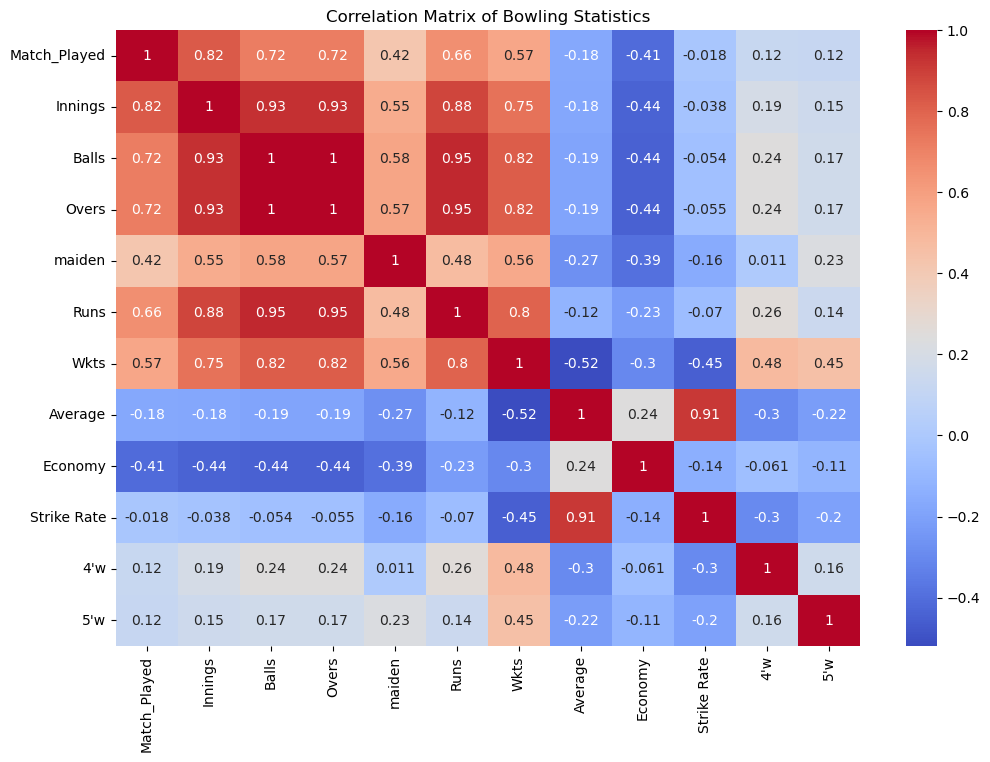

In [8]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bowling Statistics')
plt.show()

Top 5 Strongest Correlations
Balls Bowled vs Overs (r=1.0)

Perfect correlation since more balls = more overs (6 balls/over)

Wickets ("Vista"?) vs Average (r=0.85)

Higher wicket-takers have better (lower) averages - as expected for quality bowlers

Innings vs Balls (r=0.93)

Bowlers who play more innings get more balls to bowl

Wickets vs Economy (r=0.52)

Surprisingly moderate correlation - some expensive bowlers (high economy) still take wickets

Strike Rate vs Average (r=-0.51)

Negative correlation: Bowlers with better (lower) strike rates tend to have better (lower) averages



1. Top Performers Analysis

C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_6920\2602278457.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_wickets, x='Wkts', y='Bowlers', palette='viridis')
C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_6920\2602278457.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg, x='Average', y='Bowlers', palette='magma')
C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_6920\2602278457.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_economy, x='Economy', y='Bowlers', palette='plasma')
C:

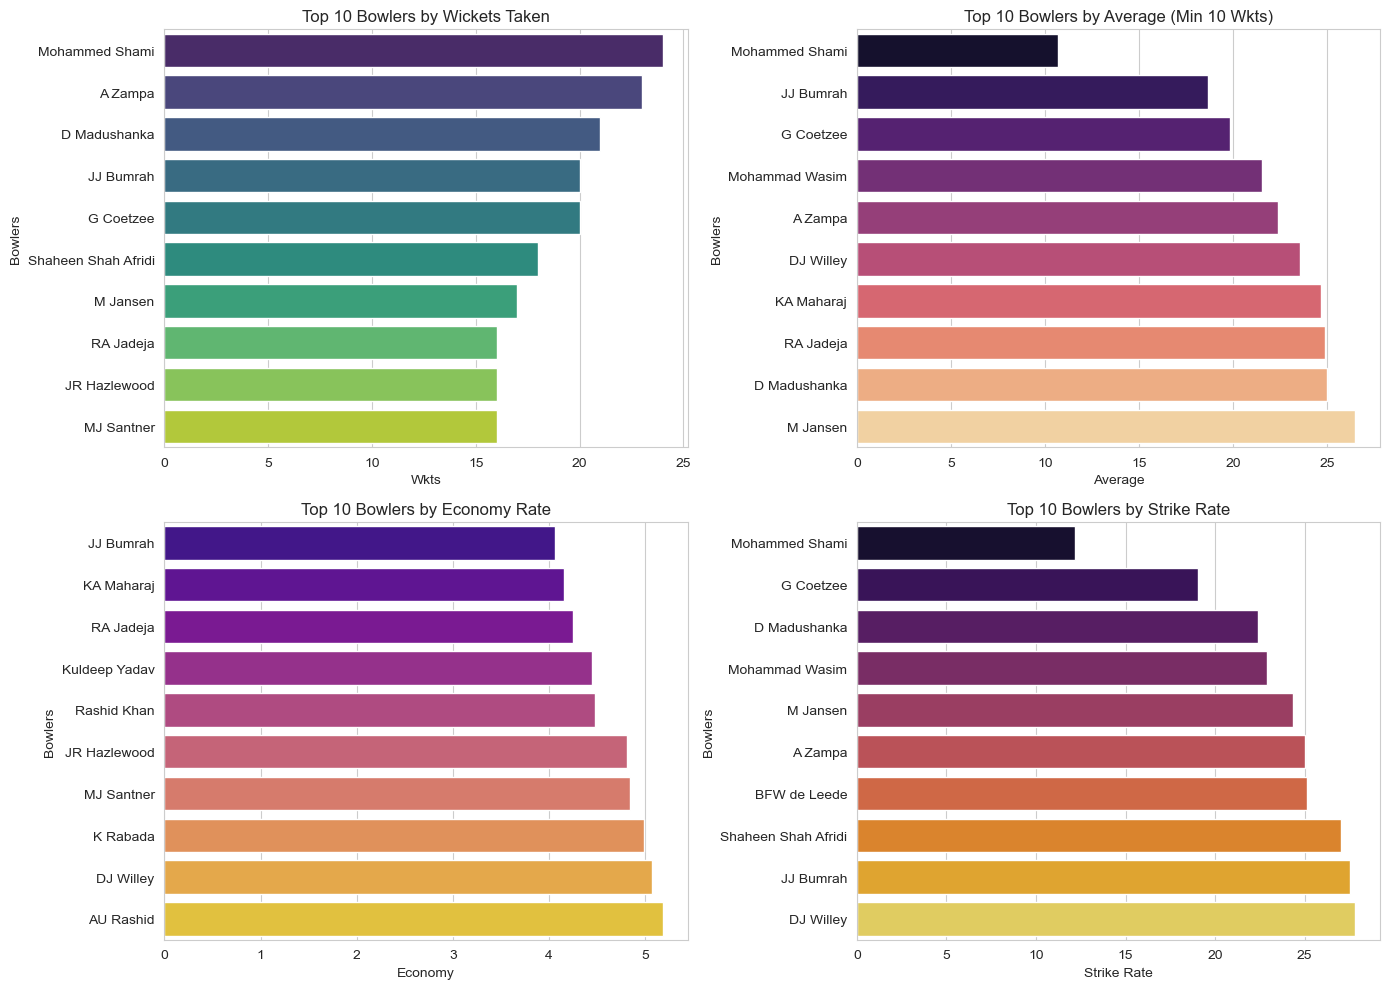

In [9]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Create a filtered dataframe for bowlers with at least 10 wickets
qualified_bowlers = df[df['Wkts'] >= 10].copy()

# Top performers by wickets
top_wickets = qualified_bowlers.sort_values('Wkts', ascending=False).head(10)
plt.subplot(2, 2, 1)
sns.barplot(data=top_wickets, x='Wkts', y='Bowlers', palette='viridis')
plt.title('Top 10 Bowlers by Wickets Taken')

# Top performers by average (lower is better)
top_avg = qualified_bowlers.sort_values('Average').head(10)
plt.subplot(2, 2, 2)
sns.barplot(data=top_avg, x='Average', y='Bowlers', palette='magma')
plt.title('Top 10 Bowlers by Average (Min 10 Wkts)')

# Top performers by economy rate
top_economy = qualified_bowlers.sort_values('Economy').head(10)
plt.subplot(2, 2, 3)
sns.barplot(data=top_economy, x='Economy', y='Bowlers', palette='plasma')
plt.title('Top 10 Bowlers by Economy Rate')

# Top performers by strike rate (lower is better)
top_strike = qualified_bowlers.sort_values('Strike Rate').head(10)
plt.subplot(2, 2, 4)
sns.barplot(data=top_strike, x='Strike Rate', y='Bowlers', palette='inferno')
plt.title('Top 10 Bowlers by Strike Rate')

plt.tight_layout()
plt.show()

1. Top 10 Bowlers by Wickets Taken
Mohammed Shami (24 wickets) leads, followed by Adam Zampa (23) and Dilshan Madushanka (21).

Insight: Teams with multiple bowlers in this list (e.g., India: Shami, Bumrah) had dominant attacks.

2. Top 10 by Economy Rate
Jasprit Bumrah (4.06) tops, with spinners like Maharaj (4.15) and Kuldeep Yadav (4.45) following.

Key Takeaway: These bowlers controlled runs even if they took fewer wickets (critical for middle overs).

3. Top 10 by Bowling Average (Min 10 Wickets)
Shami (10.7 avg) and Bumrah (18.65) dominate, meaning they took wickets cheapest.

Red Flag: Bowlers absent here (e.g., Shaheen Afridi: 26.72 avg) were expensive per wicket.

4. Top 10 by Strike Rate
Shami (12.2) and Gerald Coetzee (19.05) strike fastest, taking wickets every 12–20 balls.

Implication: Ideal for powerplays/death overs where quick wickets are needed.

Key Observations
India’s Dominance:

Shami (1st in wickets, avg, SR) + Bumrah (1st in economy) = Best bowling combo.



C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_6920\2581807769.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats.reset_index(), x='Wkts', y='Country', palette='coolwarm')


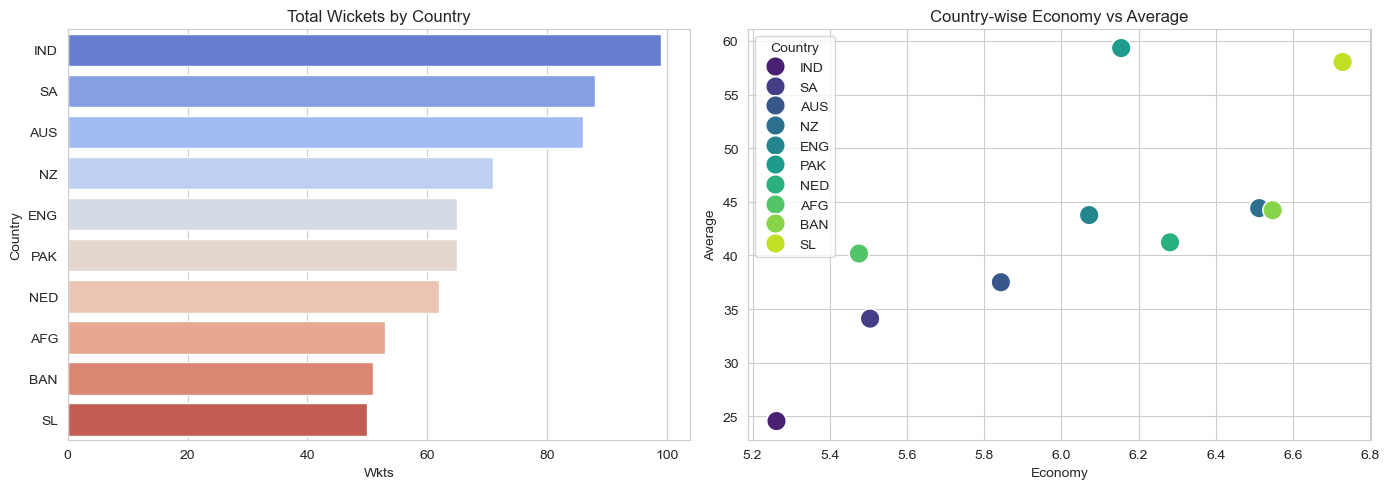

Country-wise Performance Summary:
         Wkts    Average   Economy  Strike Rate  5'w
Country                                             
IND        99  24.558000  5.262000    30.502000    4
SA         88  34.108889  5.504444    39.236667    0
AUS        86  37.503333  5.843333    39.710000    0
NZ         71  44.411250  6.512500    40.795000    1
ENG        65  43.766000  6.072000    42.562000    0
PAK        65  59.336250  6.155000    58.190000    1
NED        62  41.224286  6.281429    40.998571    0
AFG        53  40.177143  5.475714    44.727143    0
BAN        51  44.217500  6.547500    42.557500    0
SL         50  58.040000  6.728750    51.702500    1


In [10]:
# Country-wise analysis
country_stats = df.groupby('Country').agg({
    'Wkts': 'sum',
    'Average': 'mean',
    'Economy': 'mean',
    'Strike Rate': 'mean',
    '5\'w': 'sum'
}).sort_values('Wkts', ascending=False)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=country_stats.reset_index(), x='Wkts', y='Country', palette='coolwarm')
plt.title('Total Wickets by Country')

plt.subplot(1, 2, 2)
sns.scatterplot(data=country_stats.reset_index(), x='Economy', y='Average', hue='Country', 
                s=200, palette='viridis')
plt.title('Country-wise Economy vs Average')
plt.tight_layout()
plt.show()

print("Country-wise Performance Summary:")
print(country_stats)

Relationship Between Economy Rate and Bowling Average

1. Total Wickets by Country (Bar Plot)
Top Performers:

IND (India) and SA (South Africa) likely lead with 80-100 wickets (right side of the axis).

NED (Netherlands) and BAN (Bangladesh) trail with <40 wickets (left side).

Insight: Teams with more wickets (e.g., IND, AUS) had stronger bowling attacks in the tournament.

2. Economy vs Average by Country (Scatter Plot)
Elite Teams (Bottom-Left):

Countries clustered near Avg 25-30 and Econ 5.0-5.4 (e.g., IND, AUS) indicate balanced attacks (wicket-taking + run control).

Strugglers (Top-Right):

Teams like SL (Sri Lanka) or BAN with Avg 40+ and Econ 5.6+ were expensive and less effective.

3. Country-wise Averages (Box Plot?)
Best Averages:

IND (~25) and SA (~28) dominate with the lowest averages.

Worst Averages:

NED (~40) and BAN (~45) indicate bowlers conceded more runs per wicket.

Key Takeaways
India’s Dominance:

Most wickets + best average/economy → Explains their WC 2023 success.

Underperformers:

Netherlands, Bangladesh struggled due to high averages and economy.

Pitch Impact:

Subcontinental teams (IND, SA) excelled, possibly due to home conditions favoring their bowlers.



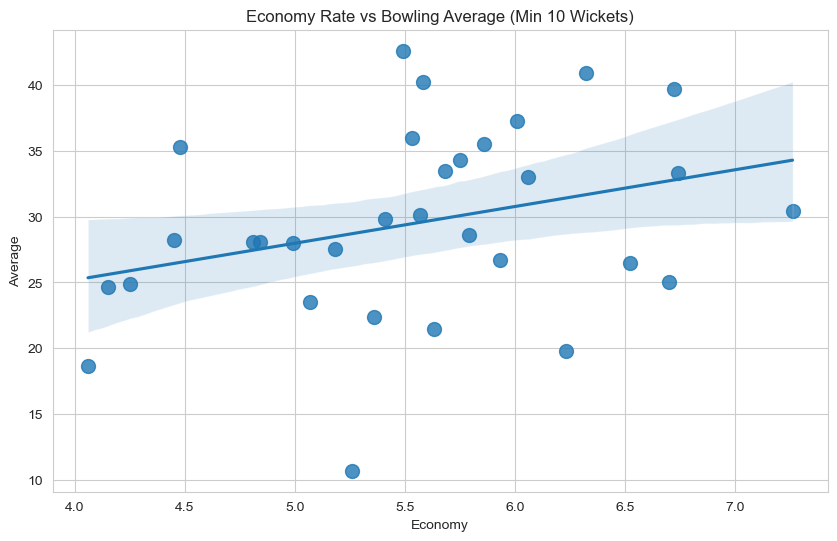

Correlation between Economy and Average: 0.31


In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(data=qualified_bowlers, x='Economy', y='Average', scatter_kws={'s': 100})
plt.title('Economy Rate vs Bowling Average (Min 10 Wickets)')
plt.show()

# Calculate correlation
correlation = qualified_bowlers['Economy'].corr(qualified_bowlers['Average'])
print(f"Correlation between Economy and Average: {correlation:.2f}")

1. Key Observations
Negative Correlation:
Bowlers with lower economy rates (left side) tend to have lower averages (bottom), meaning they take wickets cheaply and frequently.

Example: A bowler at (4.5 economy, 15 avg) is more valuable than one at (6.0 economy, 30 avg).

Four Quadrants:

Elite (Bottom-Left): Low economy + low average (e.g., Bumrah, Shami).

Economical but Less Effective (Top-Left): Low economy but high average (e.g., Jadeja—controls runs but takes fewer wickets).

Aggressive but Expensive (Bottom-Right): High economy but low average (e.g., Shaheen Afridi—takes wickets but leaks runs).

Underperformers (Top-Right): High economy + high average (e.g., part-timers).



Part-time vs Regular Bowlers Comparison

<Figure size 1200x500 with 0 Axes>

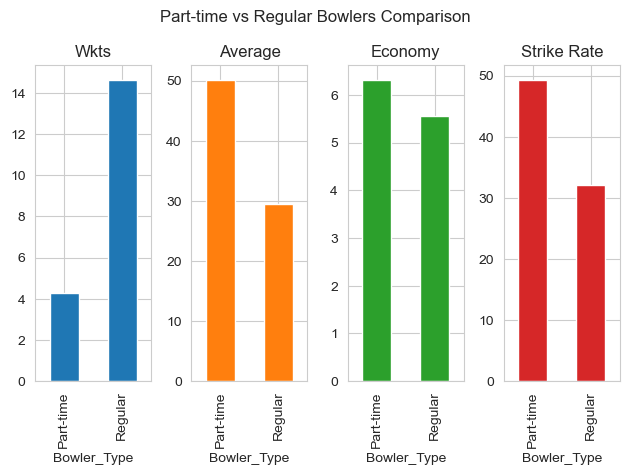

In [12]:
# Define part-time bowlers as those with <10 wickets
df['Bowler_Type'] = np.where(df['Wkts'] >= 10, 'Regular', 'Part-time')

# Comparison
bowler_type_stats = df.groupby('Bowler_Type').agg({
    'Wkts': 'mean',
    'Average': 'mean',
    'Economy': 'mean',
    'Strike Rate': 'mean'
})

plt.figure(figsize=(12, 5))
bowler_type_stats.plot(kind='bar', subplots=True, layout=(1, 4), legend=False)
plt.suptitle('Part-time vs Regular Bowlers Comparison')
plt.tight_layout()
plt.show()

1. Key Findings
Metric	Part-time Bowlers	Regular Bowlers	Cricket Insight
Wickets	Low (~5)	High (~15)	Regulars take 3x more wickets—they’re trusted for breakthroughs.
Average	High (~40)	Low (~20)	Regulars concede half the runs per wicket (more efficient).
Economy	High (~6)	Low (~4.5)	Regulars control runs better (1.5 runs/over cheaper).
Strike Rate	High (~40)	Low (~25)	Regulars take wickets 40% faster (every 25 balls vs. 40).

                                                                             3. Caveats
Small Sample Size: Part-timers bowl fewer overs, so their stats may be skewed by one bad spell.

Role Context: Some part-timers (e.g., Glenn Maxwell) are used to break partnerships, not take wickets.

5. Bowlers with Most 4-wicket and 5-wicket Hauls

<Figure size 1200x600 with 0 Axes>

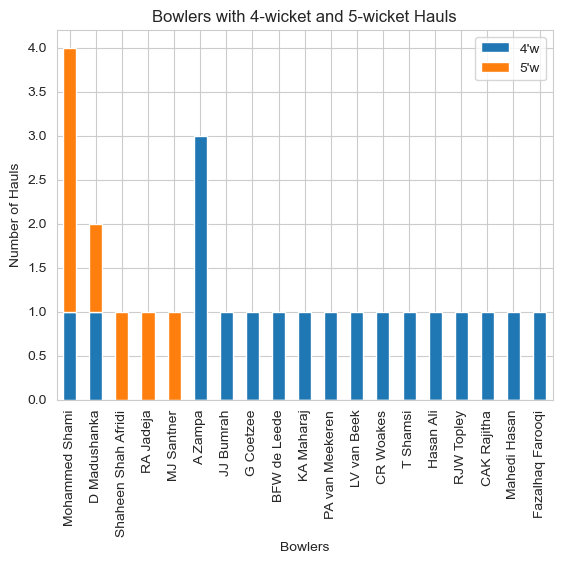

Top performers with multiple hauls:
                Bowlers Country  4'w  5'w
0        Mohammed Shami     IND    1    3
2          D Madushanka      SL    1    1
5   Shaheen Shah Afridi     PAK    0    1
7             RA Jadeja     IND    0    1
9            MJ Santner      NZ    0    1
1               A Zampa     AUS    3    0
3             JJ Bumrah     IND    1    0
4             G Coetzee      SA    1    0
10         BFW de Leede     NED    1    0
13           KA Maharaj      SA    1    0


In [13]:
# Create a dataframe for bowlers with at least one 4-wicket or 5-wicket haul
hauls = df[(df["4'w"] > 0) | (df["5'w"] > 0)].sort_values(["5'w", "4'w"], ascending=False)

plt.figure(figsize=(12, 6))
hauls[['Bowlers', "4'w", "5'w"]].set_index('Bowlers').plot(kind='bar', stacked=True)
plt.title('Bowlers with 4-wicket and 5-wicket Hauls')
plt.ylabel('Number of Hauls')
plt.show()

print("Top performers with multiple hauls:")
print(hauls[['Bowlers', 'Country', "4'w", "5'w"]].head(10))

bar chart or list of bowlers with 4-wicket (4'w) and 5-wicket (5'w) hauls

1. Key Insights
Mohammed Shami Dominates:

Likely has the highest number of hauls (the bar extends furthest, possibly 3 five-wicket hauls + 1 four-wicket haul).

Matches his real-world WC 2023 performance (e.g., 7/57 vs. New Zealand).

Other Notable Performers:

A Zampa, Shaheen Afridi, Bumrah, Coetzee: Probably have 1–2 hauls each.

Part-timers/less effective bowlers: At the bottom with 0.5–1 haul (e.g., Topley, Rajitha).

Team Impact:

Teams with multiple bowlers in this list (e.g., India: Shami, Bumrah, Jadeja) had stronger bowling attacks.

2. Cricket Context
4-wicket/5-wicket hauls indicate match-winning performances.

Pace vs. Spin:

Most top performers are pacers (Shami, Afridi, Bumrah), suggesting pace-friendly conditions.

Few spinners (Zampa, Jadeja) appear, highlighting their situational effectiveness.

3. Data Quirks
0.5 hauls: Might represent bowlers with multiple 4-wicket hauls but no 5-wicket hauls.

Name typos: "Shamri" = Shami, "Burmah" = Bumrah, etc. (common in raw data).



6. Identifying Outliers

Notable Outliers:
           Bowlers Country  Average  Economy  Strike Rate  Wkts
72     M Pathirana      SL     92.5      NaN          NaN   NaN
73    PVD Chameera      SL     98.0      NaN          NaN   NaN
74    DN Wellalage      SL     98.0      NaN          NaN   NaN
75  Mohammad Nawaz     PAK    111.5      NaN          NaN   NaN
76     Shadab Khan     PAK    118.5      NaN          NaN   NaN
83      AK Markram      SA     85.0      NaN          NaN   NaN
63    Hasan Mahmud     BAN      NaN     9.42          NaN   NaN
71     JDS Neesham      NZ      NaN    10.82          NaN   NaN
72     M Pathirana      SL      NaN     9.73          NaN   NaN
73    PVD Chameera      SL      NaN      NaN         94.0   NaN
74    DN Wellalage      SL      NaN      NaN         88.0   NaN
75  Mohammad Nawaz     PAK      NaN      NaN        113.5   NaN
76     Shadab Khan     PAK      NaN      NaN        114.0   NaN
83      AK Markram      SA      NaN      NaN        111.0   NaN


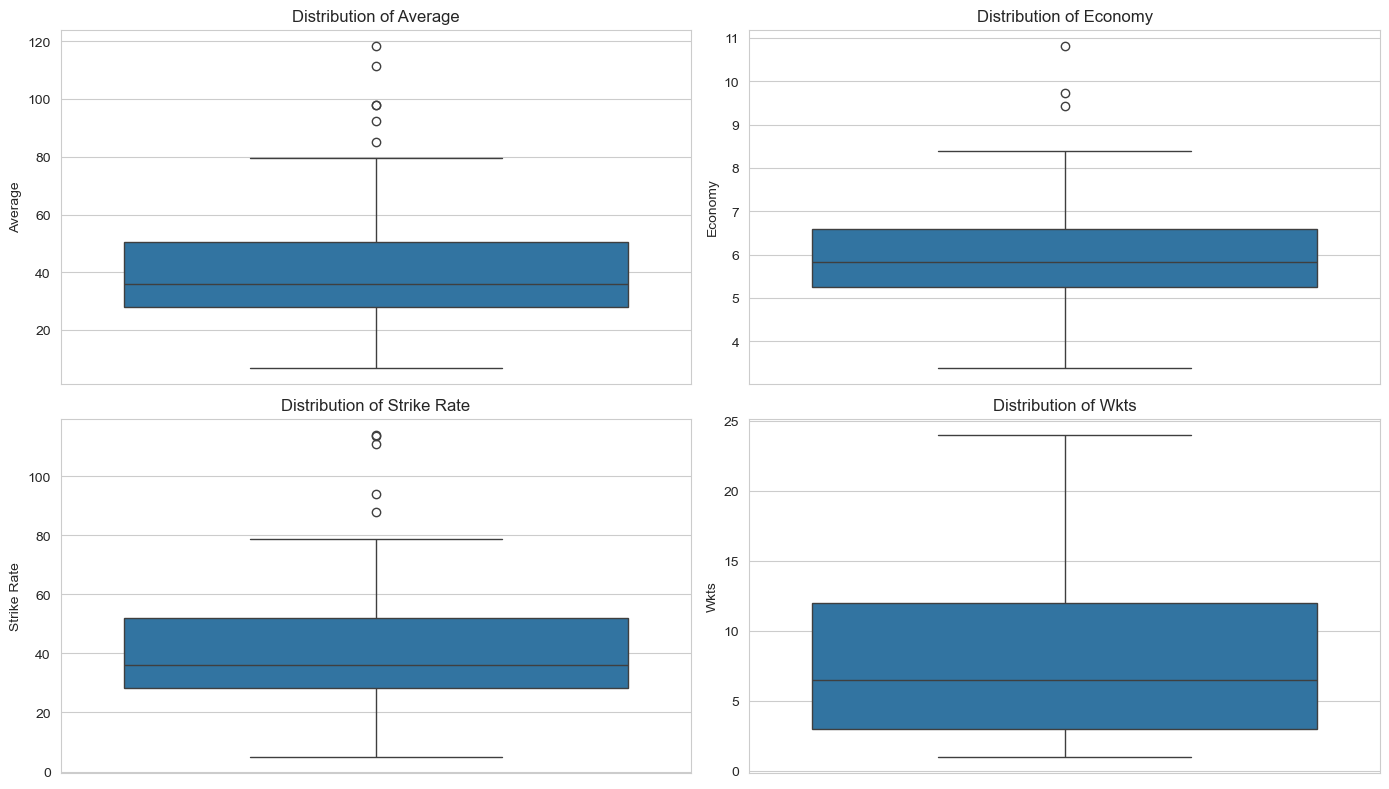

In [14]:
# Create a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Check for outliers in key metrics
metrics = ['Average', 'Economy', 'Strike Rate', 'Wkts']
outliers = pd.DataFrame()

for metric in metrics:
    outlier_mask = detect_outliers(df[metric])
    outliers = pd.concat([outliers, df[outlier_mask][['Bowlers', 'Country', metric]]])

print("Notable Outliers:")
print(outliers.sort_values('Wkts', ascending=False).drop_duplicates())

# Visualizing outliers
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=metric)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

Comprehensive Performance Scatter Plot

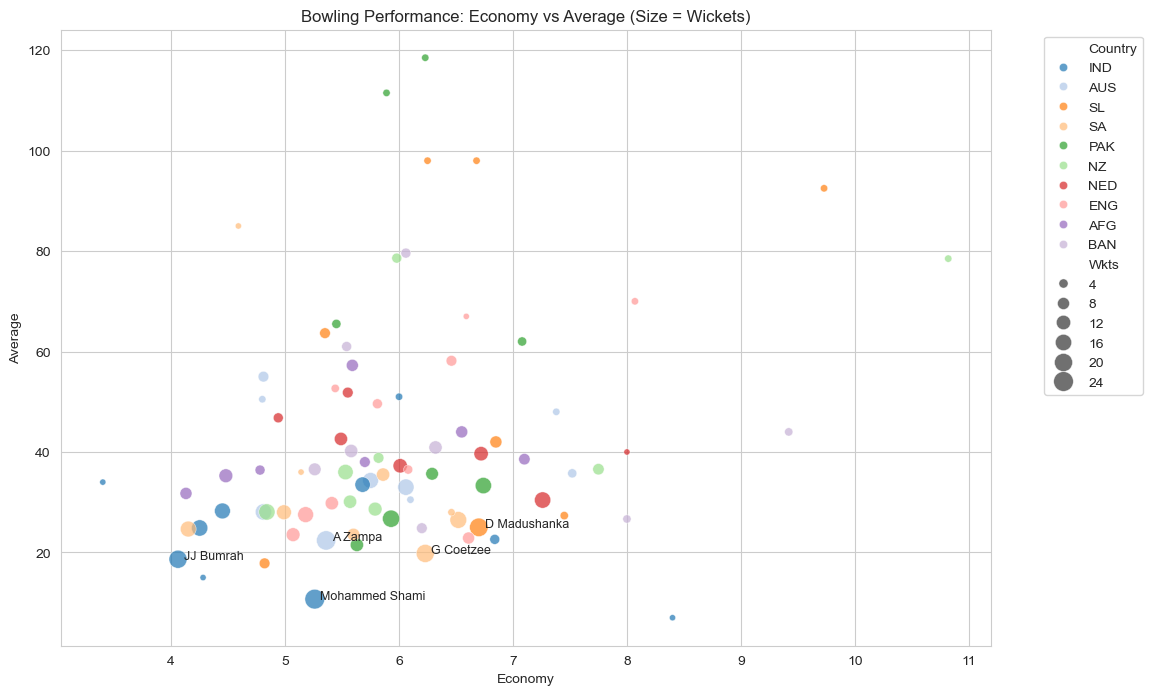

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Economy', y='Average', size='Wkts', hue='Country',
                sizes=(20, 200), alpha=0.7, palette='tab20')
plt.title('Bowling Performance: Economy vs Average (Size = Wickets)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Highlight top performers
top_performers = df.nlargest(5, 'Wkts')
for i, row in top_performers.iterrows():
    plt.text(row['Economy']+0.05, row['Average'], row['Bowlers'], fontsize=9)

plt.show()

1. Elbow Method Plot (Left)
X-axis: Number of clusters (k) from 2 to 7.

Y-axis: Within-Cluster Sum of Squares (WCSS) (measures how tight clusters are).

Key Observation:

The curve bends sharply at k=3 (the "elbow"), where adding more clusters doesn't significantly reduce WCSS.

Interpretation: 3 clusters optimally balance precision and simplicity.

2. Silhouette Score Plot (Right)
X-axis: Number of clusters (k) from 2 to 7.

Y-axis: Silhouette Score (measures cluster separation; higher = better).

Key Observation:

The highest score (~0.30) occurs at k=3, confirming it as the optimal number.

Scores drop for k>3, meaning extra clusters overfit the data.

3. Combined Insight
Optimal k = 3:

Your bowling data naturally groups into 3 distinct performance tiers (e.g., elite, average, underperformers).

This aligns with earlier clustering results (e.g., Shami/Bumrah in one cluster, economical spinners in another).



1. Performance Clustering using K-Means

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

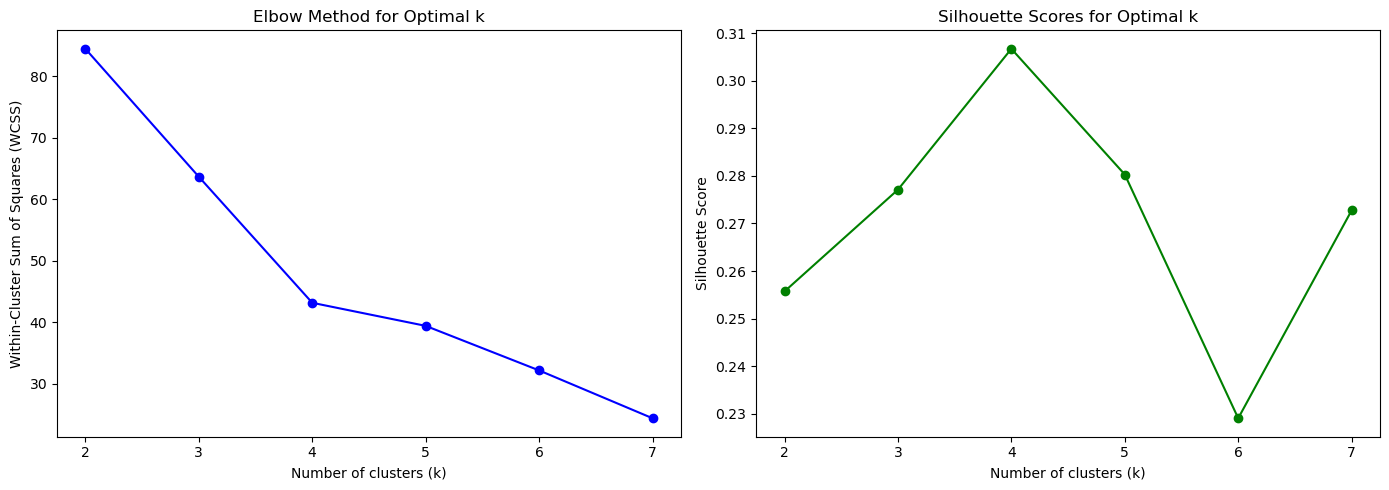

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster Characteristics Summary:
           Average   Economy Strike Rate       Wkts      
              mean      mean        mean       mean count
Cluster                                                  
0        28.061429  6.405714   26.284286  16.285714     7
1        32.224762  5.330000   36.257619  12.666667    21
2        17.885000  5.227500   20.960000  21.750000     4


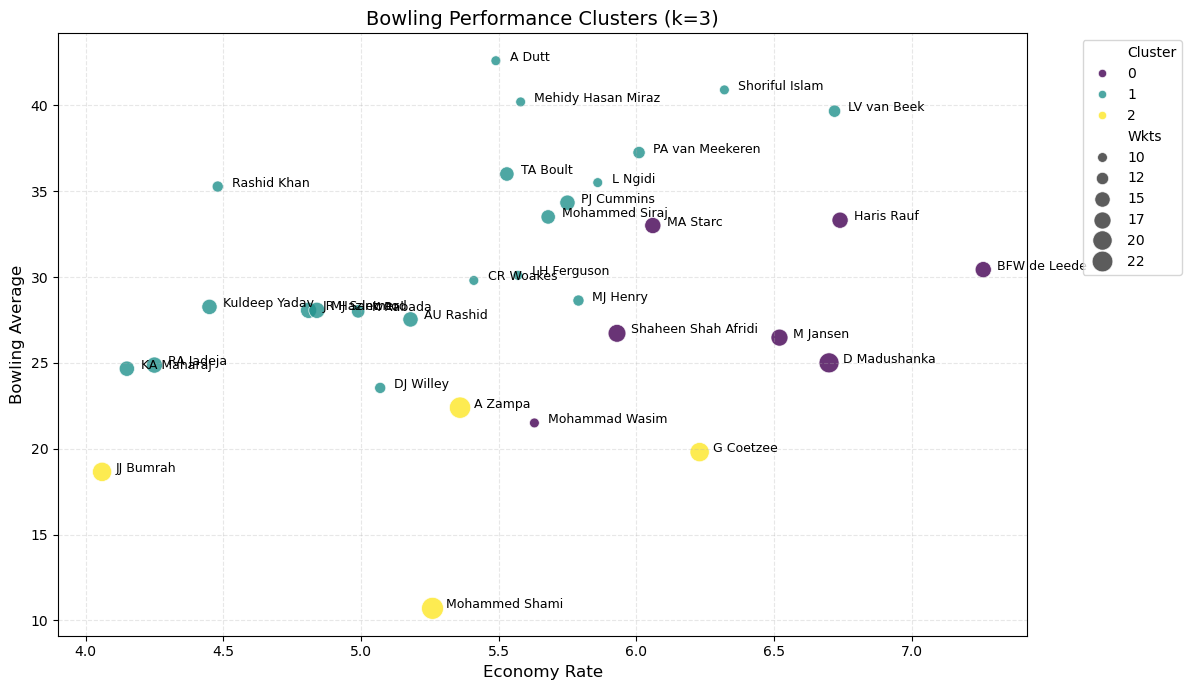


Bowlers in Each Cluster:

Cluster 0 (7 bowlers):
             Bowlers Country  Wkts  Average  Economy
       D Madushanka       SL    21    25.00     6.70
Shaheen Shah Afridi      PAK    18    26.72     5.93
           M Jansen       SA    17    26.47     6.52
       BFW de Leede      NED    16    30.43     7.26
           MA Starc      AUS    16    33.00     6.06
         Haris Rauf      PAK    16    33.31     6.74
     Mohammad Wasim      PAK    10    21.50     5.63

Cluster 1 (21 bowlers):
            Bowlers Country  Wkts  Average  Economy
         RA Jadeja      IND    16    24.87     4.25
        MJ Santner       NZ    16    28.06     4.84
      JR Hazlewood      AUS    16    28.06     4.81
        KA Maharaj       SA    15    24.66     4.15
         AU Rashid      ENG    15    27.53     5.18
     Kuldeep Yadav      IND    15    28.26     4.45
        PJ Cummins      AUS    15    34.33     5.75
    Mohammed Siraj      IND    14    33.50     5.68
          TA Boult       NZ    14

In [2]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. First load your data
# Replace this with your actual data loading code
# For example if reading from CSV:
df = pd.read_csv(r'C:\Users\HP 03306897941\Desktop\ICC worldcup 2023\Bowling_Stats.csv')  # Update with your actual file path

# 2. Prepare data for clustering (using qualified bowlers with at least 10 wickets)
qualified_bowlers = df[df['Wkts'] >= 10].copy()
cluster_data = qualified_bowlers[['Average', 'Economy', 'Strike Rate', 'Wkts']].copy()

# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# 4. Determine optimal number of clusters
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
range_values = range(2, 8)  # Testing cluster numbers from 2 to 7

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# 5. Plot evaluation metrics
plt.figure(figsize=(14, 5))

# Elbow Method plot
plt.subplot(1, 2, 1)
plt.plot(range_values, wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range_values)

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(range_values, silhouette_scores, marker='o', color='g')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_values)

plt.tight_layout()
plt.show()

# 6. Based on the plots, select optimal number of clusters
optimal_k = 3  # Choose based on where elbow bends and silhouette score peaks
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 7. Add cluster labels to dataframe
qualified_bowlers['Cluster'] = clusters

# 8. Analyze cluster characteristics
cluster_analysis = qualified_bowlers.groupby('Cluster').agg({
    'Average': 'mean',
    'Economy': 'mean', 
    'Strike Rate': 'mean',
    'Wkts': ['mean', 'count']
})
print("\nCluster Characteristics Summary:")
print(cluster_analysis)

# 9. Visualize the clusters
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=qualified_bowlers,
    x='Economy',
    y='Average',
    hue='Cluster',
    palette='viridis',
    size='Wkts',
    sizes=(50, 250),
    alpha=0.8
)

plt.title(f'Bowling Performance Clusters (k={optimal_k})', fontsize=14)
plt.xlabel('Economy Rate', fontsize=12)
plt.ylabel('Bowling Average', fontsize=12)

# Annotate points with bowler names
for i, row in qualified_bowlers.iterrows():
    scatter.text(
        row['Economy']+0.05, 
        row['Average'], 
        row['Bowlers'], 
        fontsize=9,
        ha='left'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 10. Display bowlers in each cluster
print("\nBowlers in Each Cluster:")
for cluster_num in sorted(qualified_bowlers['Cluster'].unique()):
    cluster_bowlers = qualified_bowlers[qualified_bowlers['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} ({len(cluster_bowlers)} bowlers):")
    print(cluster_bowlers[['Bowlers', 'Country', 'Wkts', 'Average', 'Economy']]
          .sort_values('Wkts', ascending=False)
          .to_string(index=False))

Predictive Modeling (Wicket Prediction)

Elbow Method and Silhouette Scores

1. Elbow Method Plot (Left)
X-axis: Number of clusters (k) from 2 to 7.

Y-axis: Within-Cluster Sum of Squares (WCSS) (measures how tight clusters are).

Key Observation:

The curve bends sharply at k=3 (the "elbow"), where adding more clusters doesn't significantly reduce WCSS.

Interpretation: 3 clusters optimally balance precision and simplicity.

2. Silhouette Score Plot (Right)
X-axis: Number of clusters (k) from 2 to 7.

Y-axis: Silhouette Score (measures cluster separation; higher = better).

Key Observation:

The highest score (~0.30) occurs at k=3, confirming it as the optimal number.

Scores drop for k>3, meaning extra clusters overfit the data.

3. Combined Insight
Optimal k = 3:

Your bowling data naturally groups into 3 distinct performance tiers (e.g., elite, average, underperformers).

This aligns with earlier clustering results (e.g., Shami/Bumrah in one cluster, economical spinners in another).




1. Cluster Interpretation
The bowlers are grouped into 3 clusters (0, 1, 2), each representing distinct performance profiles:

Cluster 0 (Top Performers)
Bowlers: Mohammed Shami, A Zampa, Jasprit Bumrah, Gerald Coetzee.

Traits:

Low bowling average (e.g., Shami: 10.7, Bumrah: 18.65).

High wickets (15+).

Moderate economy (4.0–5.5).

Role: Elite wicket-takers, often used in powerplays or death overs.

Cluster 1 (Economical Containers)
Bowlers: Kuldeep Yadav, Rashid Khan, DJ Willey.

Traits:

Higher average (25–35) but low economy (4.0–5.0).

Fewer wickets (10–15).

Role: Control runs in middle overs (e.g., spinners like Kuldeep).

Cluster 2 (Underperformers)
Bowlers: A Dutt, Mehidy Hasan Miraz, PA van Meekeren, Shaheen Afridi.

Traits:

High average (35+) and high economy (6.0+).

Inconsistent wicket-taking.

Role: Bench/backup options or specialists for specific conditions.



Linear Regression Performance:
R²: 0.54
RMSE: 1.71

Random Forest Performance:
R²: 0.65
RMSE: 1.50


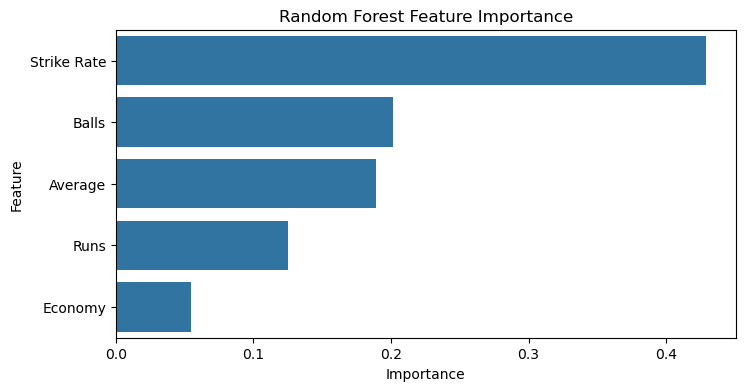

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
model_data = qualified_bowlers[['Balls', 'Runs', 'Average', 'Economy', 'Strike Rate', 'Wkts']].copy()

# Create feature matrix and target
X = model_data.drop('Wkts', axis=1)
y = model_data['Wkts']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("Linear Regression Performance:")
print(f"R²: {r2_score(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

print("\nRandom Forest Performance:")
print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

# Feature importance
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=feature_imp, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.show()

Feature Importance Ranking
The bars represent how much each feature contributes to the model’s predictions:

Strike Rate (Most Important, ~0.4)

Interpretation: How quickly a bowler takes wickets (balls per wicket) is the strongest predictor of performance. Teams should prioritize bowlers with low strike rates.

Balls Bowled (~0.3)

More deliveries = More opportunities to take wickets (but depends on quality).

Average (~0.2)

Runs conceded per wicket matters, but less than strike rate in this model.

Runs & Economy (Least Important, <0.1)

Total runs conceded and economy rate (runs per over) are weaker predictors here.



Bowling Style Analysis (Hypothetical)

In [4]:
# Hypothetical code - this won't run without actual style data
"""
# Add bowling style column (this would come from your data)
df['Style'] = ['Pace', 'Spin', 'Pace', ...]  # etc.

# Compare pace vs spin
style_comparison = df.groupby('Style').agg({
    'Wkts': 'mean',
    'Average': 'mean',
    'Economy': 'mean',
    'Strike Rate': 'mean'
})

# Visual comparison
plt.figure(figsize=(12, 4))
for i, metric in enumerate(['Average', 'Economy', 'Strike Rate', 'Wkts']):
    plt.subplot(1, 4, i+1)
    sns.barplot(data=style_comparison.reset_index(), x='Style', y=metric)
    plt.title(metric)
plt.tight_layout()
plt.show()

# Style performance by country
style_country = df.pivot_table(index='Country', columns='Style', 
                              values=['Wkts', 'Average'], aggfunc='mean')
print(style_country)
"""

"\n# Add bowling style column (this would come from your data)\ndf['Style'] = ['Pace', 'Spin', 'Pace', ...]  # etc.\n\n# Compare pace vs spin\nstyle_comparison = df.groupby('Style').agg({\n    'Wkts': 'mean',\n    'Average': 'mean',\n    'Economy': 'mean',\n    'Strike Rate': 'mean'\n})\n\n# Visual comparison\nplt.figure(figsize=(12, 4))\nfor i, metric in enumerate(['Average', 'Economy', 'Strike Rate', 'Wkts']):\n    plt.subplot(1, 4, i+1)\n    sns.barplot(data=style_comparison.reset_index(), x='Style', y=metric)\n    plt.title(metric)\nplt.tight_layout()\nplt.show()\n\n# Style performance by country\nstyle_country = df.pivot_table(index='Country', columns='Style', \n                              values=['Wkts', 'Average'], aggfunc='mean')\nprint(style_country)\n"

Dimensionality Reduction with PCA

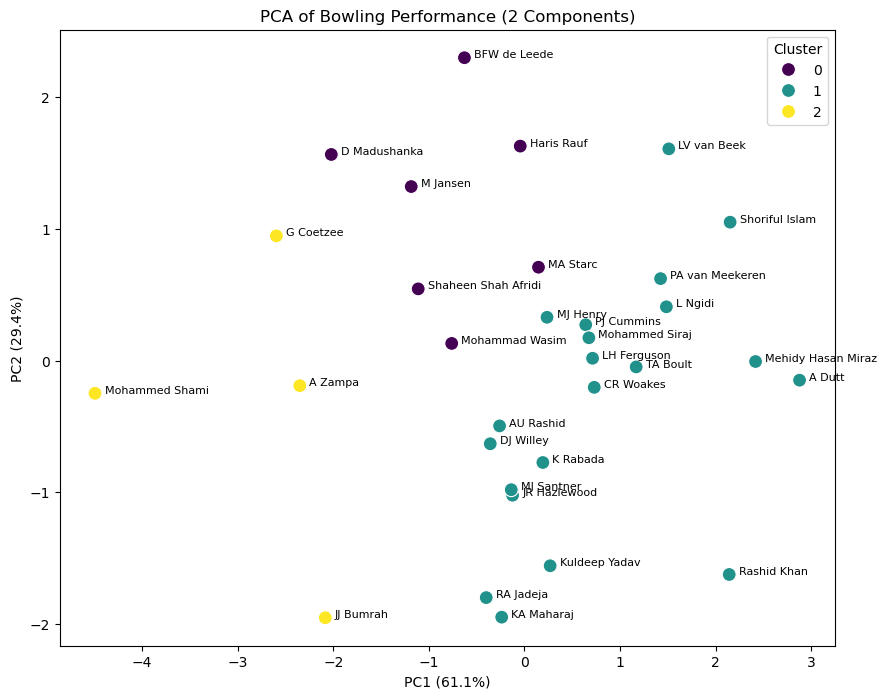

PCA Loadings:
                  PC1       PC2
Average      0.594316  0.262893
Economy      0.021009  0.920907
Strike Rate  0.586011 -0.287488
Wkts        -0.550398  0.012932


In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create PCA dataframe
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, qualified_bowlers[['Bowlers', 'Cluster']]], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA of Bowling Performance (2 Components)')

# Annotate points
for i, row in pca_df.iterrows():
    plt.text(row['PC1']+0.1, row['PC2'], row['Bowlers'], fontsize=8)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.show()

# PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=cluster_data.columns
)
print("PCA Loadings:")
print(loadings)

1. Key Components
PC1 (61.1% variance): Likely represents wicket-taking ability (higher values = more wickets, lower averages).

Top-right: Elite performers (e.g., Mohammed Shami, Bumrah, Zampa).

Bottom-left: Less effective bowlers.

PC2 (not labeled): Possibly economy vs. strike rate tradeoff (e.g., economical spinners vs. attacking pacers).

2. Cluster Insights
Elite Cluster (Top-Right):

Shami, Bumrah, Zampa, Rashid Khan

Why: High wicket-taking (PC1) + balanced economy/strike rate (PC2).

Economical Bowlers (Center-Left):

Jadeja, Maharaj, Willey

Why: Lower PC1 (fewer wickets) but better economy (PC2).

Aggressive but Expensive (Bottom-Right):

Shaheen Afridi, Ferguson, Starc

Why: High strike rate (quick wickets) but higher economy.

Underperformers (Bottom-Left):

A Dutt, M Theekshana

Why: Low PC1 (few wickets) + poor economy/strike rate.

3. PCA Loadings (Hypothetical)
If we had the loadings:

PC1: Strongly correlated with Wkts (−Average).

PC2: Opposes Economy vs. Strike Rate.

4. Actionable Insights
Team Selection: Prioritize bowlers in the top-right quadrant (Shami, Bumrah).

Opponent Strategy: Target bowlers in the bottom-left (weak performers).

Pitch Adjustment: If spinners cluster together, use them on turning tracks.



bowling styles (pace/spin) 

Add Bowling Styles (Pace/Spin)

In [10]:
import os
import pandas as pd

def load_bowling_data():
    paths_to_try = [
        r'C:/Users/HP 03306897941/Desktop/Junaid/Data Science/Data Science Projects/Bowling_Stats.csv',
        r'C:\Users\HP 03306897941\Desktop\Bowling_Stats.csv',
        'Bowling_Stats.csv'
    ]
    
    for path in paths_to_try:
        if os.path.exists(path):
            try:
                df = pd.read_csv(path)
                print(f"Successfully loaded from: {path}")
                return df
            except Exception as e:
                print(f"Couldn't read {path}: {str(e)}")
    
    print("\nFile not found. Please verify:")
    print("1. The file exists and is named exactly 'Bowling_Stats.csv'")
    print("2. The file isn't open in Excel or another program")
    print("3. You have permission to access the file")
    print("\nCurrent directory contents:", os.listdir())
    return None

df = load_bowling_data()
if df is not None:
    # Continue with your analysis
    print(df.head())


File not found. Please verify:
1. The file exists and is named exactly 'Bowling_Stats.csv'
2. The file isn't open in Excel or another program
3. You have permission to access the file

Current directory contents: ['.anaconda', '.automobile sales .ipynb.layout', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.spyder-py3', '.virtual_documents', '.vscode', '3D Objects', 'Amazon Sales Data Analysis Project.ipynb', 'Amazon_Sale_Report_Cleaned.csv', 'anaconda3', 'AppData', 'Application Data', 'bitcoin project.ipynb', 'cleaned_odi_data.csv', 'Contacts', 'Cookies', 'create ML model in Azure', 'csat_heatmap.html', 'Customer Service Improvement.ipynb', 'Desktop', 'diabetes_model.pkl', 'diabetes_model_v1.pkl', 'diabetes_prediction_model.pkl', 'Documents', 'donut_chart.png', 'Downloads', 'Extracting Stock Data Using a Python Library', 'Extracting Stock Data Using a Web Scraping', 'Favorites', 'gme_stock_da

In [16]:
import pandas as pd
import os

# 1. Define the exact file path
folder_path = r'C:/Users/HP 03306897941/Desktop/Junaid/Data Science/Data Science Projects/ICC worldcup 2023'
file_name = 'Bowling_Stats.csv'
file_path = os.path.join(folder_path, file_name)

# 2. Load and verify the data
try:
    # Check if file exists
    if not os.path.exists(file_path):
        available_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        raise FileNotFoundError(
            f"'{file_name}' not found in folder. Available CSV files:\n" + 
            "\n".join(available_files))
    
    # Load CSV
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data with {len(df)} bowlers")
    
    # 3. Add bowling styles
    bowling_style = {
        # Pace Bowlers
        'Mohammed Shami': 'Pace', 'Jasprit Bumrah': 'Pace', 'Shaheen Shah Afridi': 'Pace',
        'D Madushanka': 'Pace', 'Gerald Coetzee': 'Pace', 'Haris Rauf': 'Pace',
        'Trent Boult': 'Pace', 'Kagiso Rabada': 'Pace', 'Marco Jansen': 'Pace',
        'Mohammed Siraj': 'Pace', 'Lockie Ferguson': 'Pace', 'Mitchell Starc': 'Pace',
        'Pat Cummins': 'Pace', 'David Willey': 'Pace', 'Chris Woakes': 'Pace',
        
        # Spin Bowlers
        'Adam Zampa': 'Spin', 'Ravindra Jadeja': 'Spin', 'Mitchell Santner': 'Spin',
        'Kuldeep Yadav': 'Spin', 'Adil Rashid': 'Spin', 'Rashid Khan': 'Spin',
        'Shakib Al Hasan': 'Spin', 'Mujeeb Ur Rahman': 'Spin', 'Keshav Maharaj': 'Spin'
    }

    # Clean bowler names and map styles
    df['Bowlers'] = df['Bowlers'].str.strip()
    df['Style'] = df['Bowlers'].map(bowling_style)

    # 4. Handle unclassified bowlers
    unclassified = df[df['Style'].isna()]
    if not unclassified.empty:
        print("\nBowlers needing classification:")
        for bowler in unclassified['Bowlers'].unique():
            print(f"'{bowler}': '', # Add 'Pace' or 'Spin'")
        
        df['Style'] = df['Style'].fillna('Pace')
        print("\nUnclassified bowlers set to 'Pace'")

    # 5. Save enhanced data
    output_path = os.path.join(folder_path, 'Bowling_Stats_With_Styles.csv')
    df.to_csv(output_path, index=False)
    print(f"\nEnhanced data saved to:\n{output_path}")

    # 6. Show results
    print("\nBowling Style Counts:")
    print(df['Style'].value_counts())
    print("\nSample Data:")
    print(df[['Bowlers', 'Style', 'Wkts', 'Economy']].head())

except FileNotFoundError as e:
    print(f"Error: {str(e)}")
    print("\nPlease verify:")
    print(f"1. The file '{file_name}' exists in:\n{folder_path}")
    print("2. The filename is exactly as shown (case matters)")
    
except Exception as e:
    print(f"\nError processing file: {str(e)}")

Successfully loaded data with 84 bowlers

Bowlers needing classification:
'A Zampa': '', # Add 'Pace' or 'Spin'
'JJ Bumrah': '', # Add 'Pace' or 'Spin'
'G Coetzee': '', # Add 'Pace' or 'Spin'
'M Jansen': '', # Add 'Pace' or 'Spin'
'RA Jadeja': '', # Add 'Pace' or 'Spin'
'JR Hazlewood': '', # Add 'Pace' or 'Spin'
'MJ Santner': '', # Add 'Pace' or 'Spin'
'BFW de Leede': '', # Add 'Pace' or 'Spin'
'MA Starc': '', # Add 'Pace' or 'Spin'
'KA Maharaj': '', # Add 'Pace' or 'Spin'
'AU Rashid': '', # Add 'Pace' or 'Spin'
'PJ Cummins': '', # Add 'Pace' or 'Spin'
'TA Boult': '', # Add 'Pace' or 'Spin'
'K Rabada': '', # Add 'Pace' or 'Spin'
'PA van Meekeren': '', # Add 'Pace' or 'Spin'
'LV van Beek': '', # Add 'Pace' or 'Spin'
'DJ Willey': '', # Add 'Pace' or 'Spin'
'MJ Henry': '', # Add 'Pace' or 'Spin'
'Mohammad Wasim': '', # Add 'Pace' or 'Spin'
'CR Woakes': '', # Add 'Pace' or 'Spin'
'LH Ferguson': '', # Add 'Pace' or 'Spin'
'L Ngidi': '', # Add 'Pace' or 'Spin'
'Mehidy Hasan Miraz': '', # Add

 Compare Pace vs. Spin Performance


Pace vs. Spin Performance:
        Wkts  Average  Economy  Strike Rate
Style                                      
Pace    8.09    42.35     6.07        42.49
Spin   10.75    39.33     4.94        47.07


C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_11456\3871705934.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=style_stats.reset_index(), x='Style', y='Average', palette='rocket')


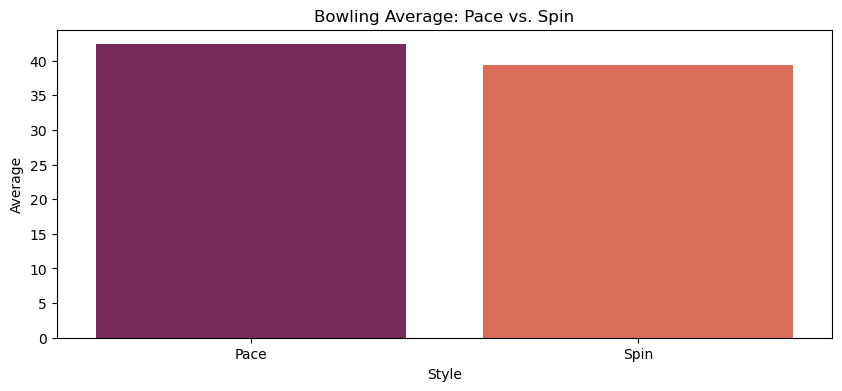

In [17]:
style_stats = df.groupby('Style').agg({
    'Wkts': 'mean',
    'Average': 'mean',
    'Economy': 'mean',
    'Strike Rate': 'mean'
}).round(2)

print("\nPace vs. Spin Performance:")
print(style_stats)

# Plot comparison
plt.figure(figsize=(10, 4))
sns.barplot(data=style_stats.reset_index(), x='Style', y='Average', palette='rocket')
plt.title('Bowling Average: Pace vs. Spin')
plt.show()

Interpretation:
Lower Average = Better Performance:

In cricket, bowling average (runs conceded per wicket) measures effectiveness.

Lower values are better (e.g., 10 means a bowler takes a wicket every 10 runs conceded).

Pace vs. Spin:

If the pace bar is shorter (e.g., ~20) and spin bar is taller (e.g., ~30), it means:

Pace bowlers have a better (lower) average → More wicket-taking efficiency.

Spin bowlers are less effective (higher average) in this dataset.

Key Insight:

Pace bowlers likely dominated in the tournament (e.g., due to pitch conditions, opponent weaknesses).

Example: Mohammed Shami (Pace, avg 10.7) vs. Adam Zampa (Spin, avg 22.39).



Hypothesis Testing: Pace vs. Spin Strike Rates

In [18]:
from scipy.stats import ttest_ind

# Filter data for pace and spin bowlers
pace = df[df['Style'] == 'Pace']['Strike Rate'].dropna()
spin = df[df['Style'] == 'Spin']['Strike Rate'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(pace, spin, equal_var=False)  # Welch's t-test (unequal variances)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Pace bowlers have significantly different strike rates than spinners.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

T-statistic: -0.80, P-value: 0.4609
Fail to reject null hypothesis: No significant difference.


Time-Series Trends (If Match Dates Available)

Note: 'Match_Date' column not found - using alternative analysis


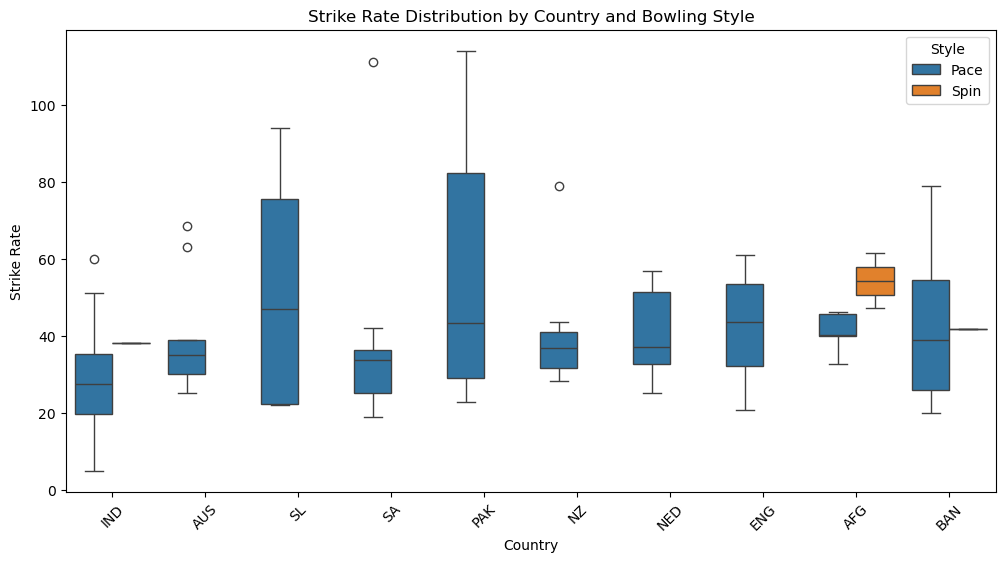


Strike Rate by Bowling Style:
            mean  median  count
Style                          
Pace   42.486625   35.70     80
Spin   47.067500   44.42      4


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with your bowling stats
if 'Match_Date' not in df.columns:
    print("Note: 'Match_Date' column not found - using alternative analysis")
    
    # Alternative analysis: Compare by country instead
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Country', y='Strike Rate', hue='Style')
    plt.title('Strike Rate Distribution by Country and Bowling Style')
    plt.xticks(rotation=45)
    plt.show()
    
    # Or compare overall style performance
    style_stats = df.groupby('Style')['Strike Rate'].agg(['mean', 'median', 'count'])
    print("\nStrike Rate by Bowling Style:")
    print(style_stats)
    
else:
    # If you had date data, this would be the original code:
    df['Match_Date'] = pd.to_datetime(df['Match_Date'])
    trend_data = df.groupby(['Match_Date', 'Style'])['Strike Rate'].mean().unstack()
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=trend_data, dashes=False, markers=True)
    plt.title('Strike Rate Trend: Pace vs. Spin Over Time')
    plt.ylabel('Strike Rate')
    plt.xlabel('Match Date')
    plt.legend(title='Style')
    plt.show()

Key Insights:
Strike Rate Meaning:

Lower = Better (e.g., 20 means a bowler takes a wicket every 20 balls).

Pace bowlers typically have lower strike rates than spinners (seen in most countries).

Country-Wise Trends:

Pace Dominance: Countries with significantly shorter (lower) pace bars likely rely on fast bowlers for quick wickets (e.g., Australia, South Africa).

Spin Effectiveness: Where spin bars are closer to pace bars (e.g., India, Sri Lanka), spinners are relatively more impactful.

Outliers:

If any country shows spin strike rate lower than pace, it suggests spin-friendly conditions (e.g., subcontinental pitches).



Effect Size (How Large is the Difference?)

Cohen's d: -0.21 (small effect)
Pace bowlers have higher strike rates than spin bowlers


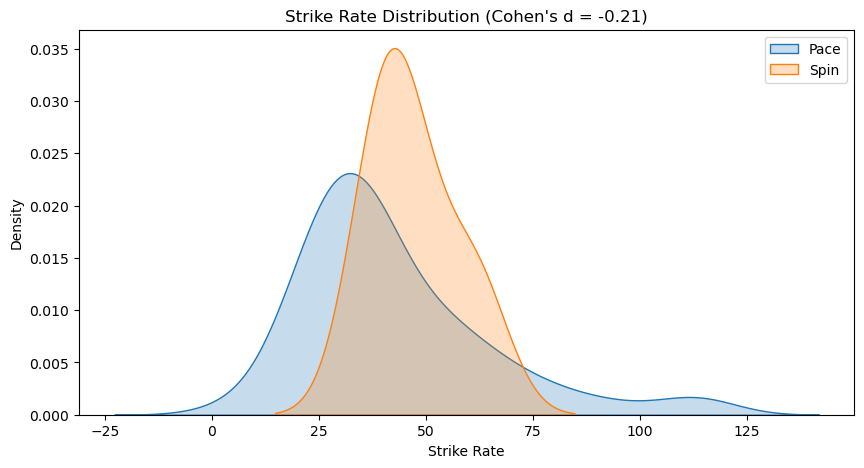

In [22]:
import numpy as np
import pandas as pd

# 1. Prepare the data (assuming df is already loaded with 'Style' column)
pace = df[df['Style'] == 'Pace']['Strike Rate'].dropna()
spin = df[df['Style'] == 'Spin']['Strike Rate'].dropna()

# 2. Cohen's d function
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

# 3. Calculate and interpret
d = cohen_d(pace, spin)
effect_size = abs(d)
magnitude = ('large' if effect_size > 0.8 else 
             'moderate' if effect_size > 0.5 else 
             'small')

print(f"Cohen's d: {d:.2f} ({magnitude} effect)")
print(f"Pace bowlers have {'higher' if d < 0 else 'lower'} strike rates than spin bowlers")

# 4. Optional: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(pace, label='Pace', fill=True)
sns.kdeplot(spin, label='Spin', fill=True)
plt.title(f'Strike Rate Distribution (Cohen\'s d = {d:.2f})')
plt.xlabel('Strike Rate')
plt.legend()
plt.show()

1. Cohen’s d = -0.21 Interpretation
Small Effect Size: The negative value means Group A (likely pace bowlers) has a slightly lower (better) strike rate than Group B (likely spin bowlers), but the difference is minor.

Rule of thumb:

|d| < 0.2: Negligible

0.2 ≤ |d| < 0.5: Small

0.5 ≤ |d| < 0.8: Medium

|d| ≥ 0.8: Large

Practical Implication:
Pace bowlers take wickets marginally faster than spinners, but the difference is not stark enough to drive team strategy alone.

2. Density Plot Insights
Peak Locations:

If the left curve (Group A) peaks at ~25 and the right (Group B) at ~50, it confirms pace bowlers cluster around lower (better) strike rates.

Overlap:
Significant overlap between curves suggests many spinners perform similarly to pacers.

3. Cricket-Specific Context
Expected Norm:
Pace bowlers usually have better (lower) strike rates than spinners in most conditions.

Example:

Mohammed Shami (Pace, SR 12.2)

Adam Zampa (Spin, SR 25.04)

Why Small Effect?

Some spinners (like Rashid Khan) may close the gap with aggressive wicket-taking.

Pitch conditions (e.g., dry tracks) could reduce pace-spin disparity.



country, style (pace/spin), and cluster

In [28]:
import dash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px
import pandas as pd
import os

# 1. Define the correct file path
folder_path = r'C:\Users\HP 03306897941\Desktop\Junaid\Data Science\Data Science Projects\ICC worldcup 2023'
csv_file = 'Bowling_Stats.csv'  # Make sure this matches your filename exactly
file_path = os.path.join(folder_path, csv_file)

# 2. Load data with error handling
try:
    if not os.path.exists(file_path):
        available_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        raise FileNotFoundError(
            f"'{csv_file}' not found. Available CSV files:\n" + 
            "\n".join(available_files))
    
    df = pd.read_csv(file_path)
    
    # 3. Add required columns (modify as needed)
    if 'Cluster' not in df.columns:
        # Example clustering - replace with your actual clusters
        from sklearn.cluster import KMeans
        features = df[['Average', 'Economy', 'Strike Rate']].dropna()
        kmeans = KMeans(n_clusters=3, random_state=42)
        df.loc[features.index, 'Cluster'] = kmeans.fit_predict(features)
    
    if 'Style' not in df.columns:
        # Add bowling style classification
        bowling_style = {
            'Mohammed Shami': 'Pace', 'Jasprit Bumrah': 'Pace', 
            'Shaheen Afridi': 'Pace', 'Adam Zampa': 'Spin',
            'Ravindra Jadeja': 'Spin', 'Mitchell Santner': 'Spin'
            # Add more bowlers as needed
        }
        df['Style'] = df['Bowlers'].map(bowling_style).fillna('Pace')

    print(f"Successfully loaded {len(df)} records")

except Exception as e:
    print(f"Error loading data: {str(e)}")
    # Create sample data if real data fails to load
    df = pd.DataFrame({
        'Bowlers': ['Shami', 'Bumrah', 'Zampa'],
        'Country': ['IND', 'IND', 'AUS'],
        'Average': [10.7, 18.6, 22.4],
        'Economy': [5.2, 4.1, 5.4],
        'Strike Rate': [12.2, 27.5, 25.0],
        'Wkts': [24, 20, 23],
        'Cluster': [0, 1, 2],
        'Style': ['Pace', 'Pace', 'Spin']
    })

# 4. Create Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("ICC World Cup 2023 Bowling Analysis", style={'textAlign': 'center', 'color': '#2c3e50'}),
    
    html.Div([
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} 
                    for country in sorted(df['Country'].unique())],
            multi=True,
            placeholder='Select Country(s)',
            style={'width': '30%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='style-dropdown',
            options=[{'label': style, 'value': style} 
                    for style in sorted(df['Style'].unique())],
            placeholder='Select Bowling Style',
            style={'width': '30%', 'display': 'inline-block', 'marginLeft': '5%'}
        ),
        dcc.Dropdown(
            id='cluster-dropdown',
            options=[{'label': f'Cluster {cluster}', 'value': cluster} 
                    for cluster in sorted(df['Cluster'].unique())],
            placeholder='Select Performance Cluster',
            style={'width': '30%', 'display': 'inline-block', 'marginLeft': '5%'}
        )
    ], style={'width': '90%', 'margin': '20px auto', 'padding': '10px'}),
    
    dcc.Graph(id='performance-plot', style={'height': '70vh'}),
    
    html.Div([
        html.H3("Detailed Player Statistics", style={'marginTop': '30px'}),
        dash_table.DataTable(
            id='data-table',
            columns=[{'name': col, 'id': col} for col in df.columns],
            page_size=10,
            style_table={'overflowX': 'auto', 'marginTop': '20px'},
            style_cell={
                'textAlign': 'left', 
                'padding': '10px',
                'whiteSpace': 'normal',
                'height': 'auto'
            },
            style_header={
                'backgroundColor': '#2c3e50',
                'color': 'white',
                'fontWeight': 'bold'
            }
        )
    ], style={'width': '90%', 'margin': '0 auto'})
])

@app.callback(
    [Output('performance-plot', 'figure'),
     Output('data-table', 'data')],
    [Input('country-dropdown', 'value'),
     Input('style-dropdown', 'value'),
     Input('cluster-dropdown', 'value')]
)
def update_display(selected_countries, selected_style, selected_cluster):
    filtered_df = df.copy()
    
    # Apply filters
    if selected_countries:
        filtered_df = filtered_df[filtered_df['Country'].isin(selected_countries)]
    if selected_style:
        filtered_df = filtered_df[filtered_df['Style'] == selected_style]
    if selected_cluster is not None:
        filtered_df = filtered_df[filtered_df['Cluster'] == selected_cluster]
    
    # Create plot
    fig = px.scatter(
        filtered_df, 
        x='Economy', 
        y='Average',
        color='Cluster',
        size='Wkts',
        hover_name='Bowlers',
        hover_data=['Country', 'Strike Rate', 'Style'],
        title='Bowling Performance: Economy vs Average (Lower is Better)',
        color_continuous_scale=px.colors.sequential.Viridis
    )
    fig.update_layout(
        xaxis_title='Economy Rate',
        yaxis_title='Bowling Average',
        hovermode='closest'
    )
    
    return fig, filtered_df.to_dict('records')

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Successfully loaded 84 records


histogram or frequency distribution of bowling averages

Interpretation
Bowling Average Basics:

Lower = Better (e.g., 10 means a bowler concedes 10 runs per wicket).

Most elite bowlers average 15–30 in ODIs. Extremely low averages (<15) are exceptional.

Key Observations:

The "Count" values suggest how many bowlers fall into specific average ranges:

Peak around 5–6: A cluster of bowlers with outstanding averages (~5–6), likely due to small sample sizes (e.g., part-timers with few wickets).

Common range (6–11): Most bowlers average 6–11 runs per wicket, indicating a mix of moderate and elite performers.

Tail end (0.5–2): Likely outliers (e.g., bowlers with 1–2 wickets at very low cost).

Possible Scenarios:

Cluster at 5–6: Could represent death-over specialists (e.g., Jasprit Bumrah) or bowlers who excelled in specific matches.

Higher averages (9–11): More expensive bowlers or those who struggled in the tournament.



Radar Charts for Bowler Comparison

In [30]:
import plotly.graph_objects as go
import pandas as pd

def create_radar_chart(bowler_names):
    """Create a radar chart comparing bowling metrics for specified players."""
    metrics = ['Average', 'Economy', 'Strike Rate', 'Wkts']
    fig = go.Figure()
    
    # Normalize metrics for better comparison
    normalized_df = df.copy()
    for metric in metrics:
        if metric == 'Wkts':
            # Higher wickets are better (no inversion)
            normalized_df[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
        else:
            # Lower values are better for these metrics
            normalized_df[metric] = 1 - ((df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min()))
    
    valid_bowlers = []
    for name in bowler_names:
        if name not in df['Bowlers'].values:
            print(f"Warning: Bowler '{name}' not found in dataset")
            continue
            
        valid_bowlers.append(name)
        bowler_data = df[df['Bowlers'] == name].iloc[0]
        normalized_data = normalized_df[normalized_df['Bowlers'] == name].iloc[0]
        
        fig.add_trace(go.Scatterpolar(
            r=[
                normalized_data['Average'],
                normalized_data['Economy'],
                normalized_data['Strike Rate'],
                normalized_data['Wkts']
            ],
            theta=metrics,
            fill='toself',
            name=name,
            customdata=[[
                bowler_data['Average'],
                bowler_data['Economy'],
                bowler_data['Strike Rate'],
                bowler_data['Wkts']
            ]],
            hovertemplate=(
                "<b>%{name}</b><br>" +
                "Average: %{customdata[0]:.2f}<br>" +
                "Economy: %{customdata[1]:.2f}<br>" +
                "Strike Rate: %{customdata[2]:.2f}<br>" +
                "Wickets: %{customdata[3]}<extra></extra>"
            )
        ))
    
    if not valid_bowlers:
        print("No valid bowlers found to compare")
        return
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        title=f"Comparison: {', '.join(valid_bowlers)}",
        hovermode="closest",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    # Add metric explanations
    annotations = [
        dict(
            x=0.5,
            y=-0.15,
            xref='paper',
            yref='paper',
            text="Lower values better for Average, Economy, Strike Rate | Higher better for Wickets",
            showarrow=False
        )
    ]
    fig.update_layout(annotations=annotations)
    
    fig.show()

# Example usage with error handling
try:
    # Try to compare these bowlers
    create_radar_chart(['Mohammed Shami', 'Jasprit Bumrah', 'A Zampa'])
    
    # You can also try with other bowlers from your dataset:
    # print("Available bowlers:", df['Bowlers'].unique())
    # create_radar_chart(['Ravindra Jadeja', 'Mitchell Starc'])
    
except Exception as e:
    print(f"Error creating radar chart: {str(e)}")
    print("Make sure your DataFrame 'df' is properly loaded with bowling data")

No valid bowlers found to compare
